In [1]:
import os
from basket.utils.yaml import read_yaml_file, dump_exp_yaml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    import scienceplots
    plt.style.use(['science'])
except Exception:
    pass

In [3]:
exp_folder_path = os.path.join('..', 'exp')
exp_configs = {}

In [4]:
for exp in os.listdir(exp_folder_path):
    if '_' in exp: continue
    exp_path = os.path.join(exp_folder_path, exp)
    content = read_yaml_file(os.path.join(exp_path, 'config.yaml'))
    exp_configs[exp] = content

In [5]:
def read_from_csv(file):
    return np.genfromtxt(file, delimiter=',')
def read_loss_arr(exp):
    return read_from_csv(os.path.join(exp_folder_path, exp, 'loss.csv'))

In [6]:
def plot_converge_length(ax, sim_type, iter_bound=300, offset_y=-50):
    for opt_type in ['BGD', 'SGD', 'Adam']:
        arr_x, arr_y = [], []
        for exp, config in exp_configs.items():
            if config['sim']['type'] != sim_type: continue
            if config['optimizer']['type'] != opt_type: continue

            target = config['environment']['target_pos'][1]
            arr_x.append(target)

            loss = read_loss_arr(exp)
            num_iter = loss.shape[0]
            arr_y.append(num_iter)

            N = len(config['tap_times'])

            if num_iter > iter_bound:
                ax.text(target + 0.1, num_iter + offset_y, str(N))

        ax.scatter(arr_x, arr_y, label=opt_type)

    ax.set_xlabel('$x_{\\text{but},2}$')
    ax.set_ylabel(r"nombre d'itérations")
    ax.legend(frameon=True)

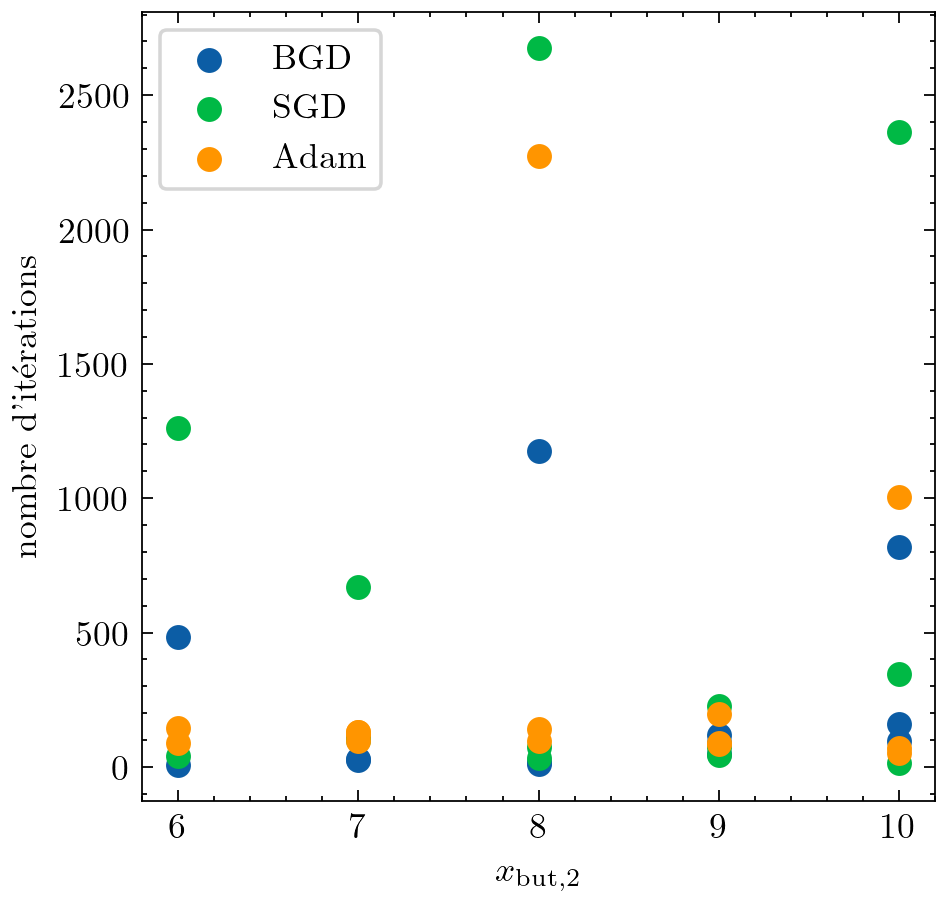

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=256)
plot_converge_length(ax, 'analytical', iter_bound=3000)
plt.savefig(os.path.join('..', 'projet-figures', 'env_analytique.png'))

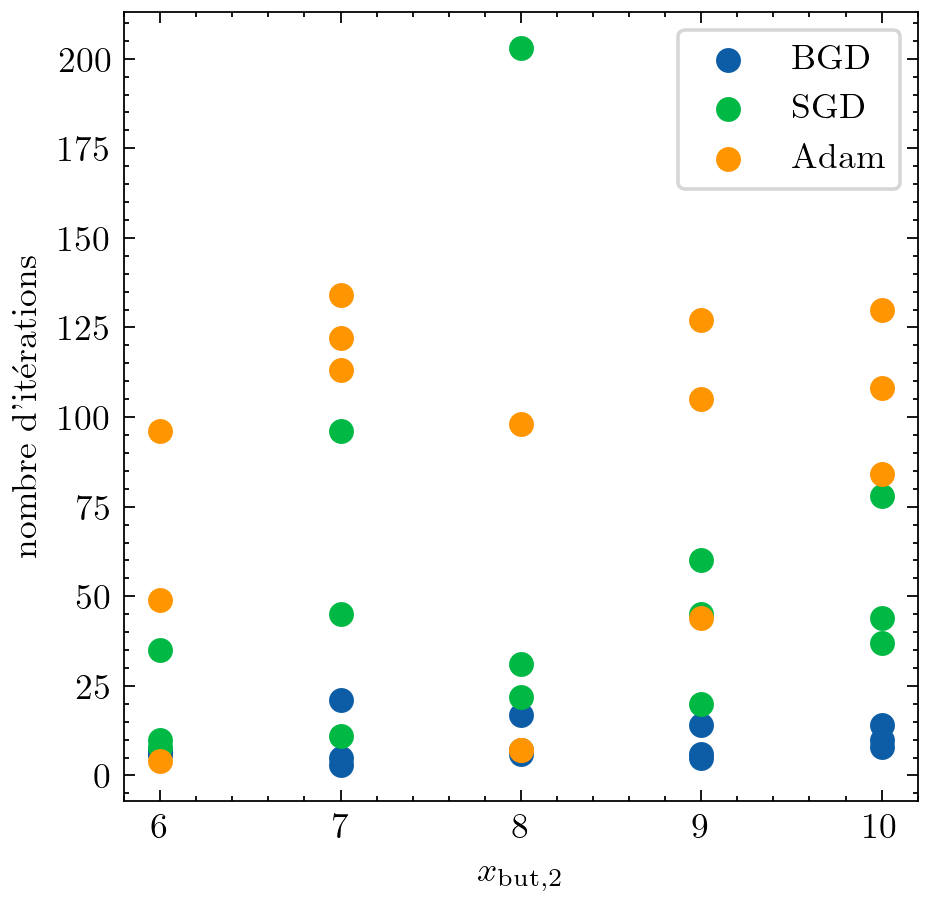

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=256)
plot_converge_length(ax, 'euler', iter_bound=500, offset_y=-1)
plt.savefig(os.path.join('..', 'projet-figures', 'env_euler.png'))

1713616798
1713616807
1713616815
1713674318


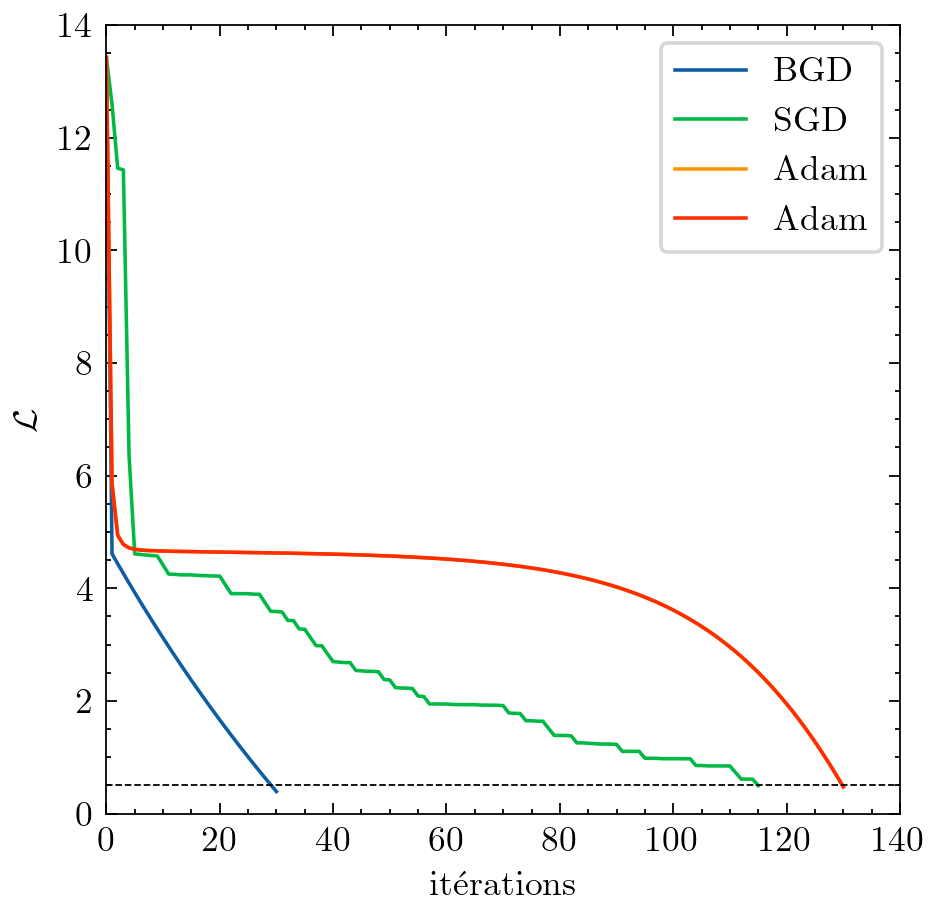

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=256)

for opt_type in ['BGD', 'SGD', 'Adam']:
    for exp, config in exp_configs.items():
        if config['sim']['type'] != 'analytical': continue
        if config['optimizer']['type'] != opt_type: continue

        target = config['environment']['target_pos'][1]
        N = len(config['tap_times'])
        
        if target == 7 and N == 4:
            print(exp)
            loss = read_loss_arr(exp)
            num_iter = loss.shape[0]
            ax.plot(range(num_iter), loss[:, 0], label=opt_type)

ax.set_xlabel('itérations')
ax.set_ylabel('$\mathcal L$')
ax.set_ylim(0, 14)
ax.set_xlim(0, 140)
ax.plot([0, 140], [0.5, 0.5], '--', c='black', lw=0.5)
ax.legend(frameon=True)

plt.savefig(os.path.join('..', 'projet-figures', 'loss_ana.png'))

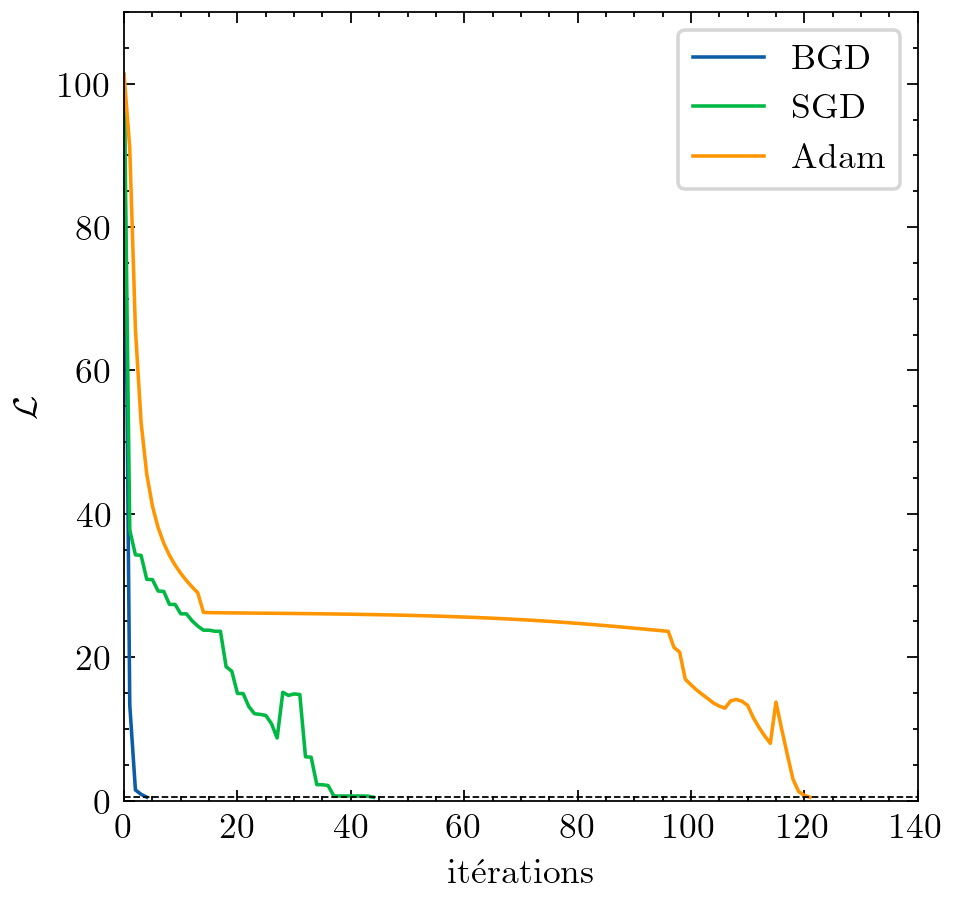

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=256)

for opt_type in ['BGD', 'SGD', 'Adam']:
    for exp, config in exp_configs.items():
        if config['sim']['type'] != 'euler': continue
        if config['optimizer']['type'] != opt_type: continue

        target = config['environment']['target_pos'][1]
        N = len(config['tap_times'])
        
        if target == 7 and N == 4:
            loss = read_loss_arr(exp)
            num_iter = loss.shape[0]
            ax.plot(range(num_iter), loss[:, 0], label=opt_type)

ax.set_xlabel('itérations')
ax.set_ylabel('$\mathcal L$')
ax.set_ylim(0, 110)
ax.set_xlim(0, 140)
ax.plot([0, 140], [0.5, 0.5], '--', c='black', lw=0.5)
ax.legend(frameon=True)

plt.savefig(os.path.join('..', 'projet-figures', 'loss_eul.png'))

In [11]:
for opt_type in ['BGD', 'SGD', 'Adam']:
    arr_x, arr_y = [], []
    for exp, config in exp_configs.items():
        if config['sim']['type'] != 'analytical': continue
        if config['optimizer']['type'] != opt_type: continue

        target = config['environment']['target_pos'][1]
        arr_x.append(target)

        loss = read_loss_arr(exp)
        num_iter = loss.shape[0]
        arr_y.append(num_iter)

        N = len(config['tap_times'])

        if num_iter > 2000:
            print(exp, opt_type, num_iter)

1713615947 SGD 2364
1713617027 SGD 2676
1713617111 Adam 2272


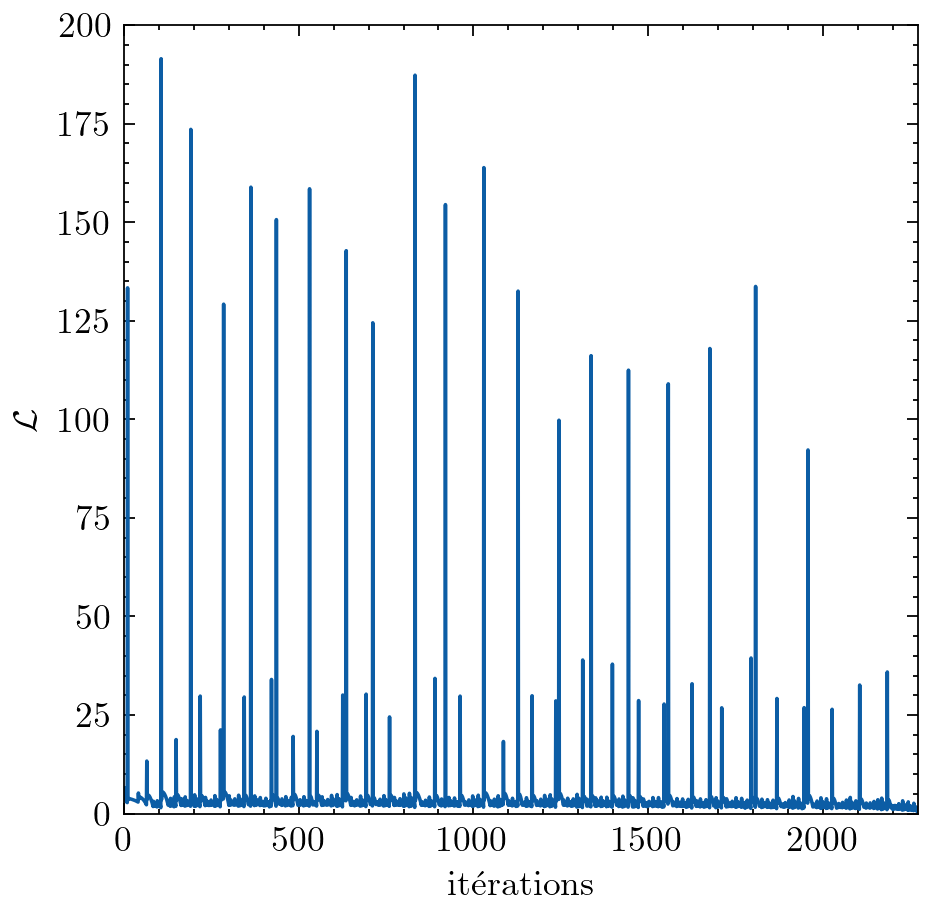

In [12]:
exp = '1713617111'
loss = read_loss_arr(exp)
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=256)
ax.plot(range(loss.shape[0]), loss[:, 0])
ax.set_xlabel('itérations')
ax.set_ylabel('$\mathcal L$')
ax.set_ylim(0, 200)
ax.set_xlim(0, loss.shape[0])
plt.savefig(os.path.join('..', 'projet-figures', 'failed_loss.png'))

In [13]:
exp_path = os.path.join(exp_folder_path, exp)
exp1_path = os.path.join(exp_folder_path, exp + '_1')
exp2_path = os.path.join(exp_folder_path, exp + '_2')
if not os.path.exists(exp1_path):
    os.system('cp -r {} {}'.format(exp_path, exp1_path))
if not os.path.exists(exp2_path):
    os.system('cp -r {} {}'.format(exp_path, exp2_path))

In [14]:
content = read_yaml_file(os.path.join(exp_path, 'config.yaml'))
dump_exp_yaml(os.path.join(exp1_path, 'config.yaml'), content,
              tap_times=loss[1508][1:].tolist(), init_tap_times=content['init_tap_times'])
content = read_yaml_file(os.path.join(exp_path, 'config.yaml'))
dump_exp_yaml(os.path.join(exp2_path, 'config.yaml'), content,
              tap_times=loss[1509][1:].tolist(), init_tap_times=content['init_tap_times'])